## <center><h1><b><i> ***kNN*** </i></b></h1></center>

## ***Importing Libraries***

In [30]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

## ***Reading Data***

In [31]:
df = pd.read_csv('Wholesale_customers_data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## ***Inspect Dataset Columns and Class Distribution***

In [32]:
print(df.columns)
print(df.Region.value_counts())

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')
Region
3    316
1     77
2     47
Name: count, dtype: int64


In [33]:
X = df.drop(['Region'], axis='columns')
y = df.Region

In [34]:
print(X.shape)

(440, 7)


In [35]:
X = pd.get_dummies(X)

## ***Splitting Data***

In [36]:
X_train, X_test, y_train, y_test = train_test_split( X, y,test_size=0.2, stratify=y, random_state=2) 
#data set is split into training and testing data set.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(352, 7)
(352,)
(88, 7)
(88,)


In [37]:
# scaler = StandardScaler()

# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

clf = KNeighborsClassifier() 
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
scores = cross_val_score(clf, X_train_scaled, y_train, cv=5)

print('Validation Accuracy, z-scaled', scores.mean())

Validation Accuracy, z-scaled 0.6362575452716298


In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
scores = cross_val_score(clf, X_train_scaled, y_train, cv=5)

print('Validation Accuracy, min-max', scores.mean())

Validation Accuracy, min-max 0.6703018108651911


## ***Training kNN Model***

In [39]:

# Scale the data
scaler = MinMaxScaler()
scaler.fit(X_train)  # Fit on training data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Transform test data using the same scaler

# Initialize lists for tracking accuracy
training_accuracy = []
test_accuracy = []
validation_accuracy = []

# Loop over different values of k
for k in range(1, 30):
    # Build the model
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_scaled, y_train)
    
    # Training accuracy
    training_accuracy.append(clf.score(X_train_scaled, y_train))
    
    # Validation accuracy (cross-validation)
    scores = cross_val_score(clf, X_train_scaled, y_train, cv=10)
    print("k:", k, "val acc:", scores.mean())
    validation_accuracy.append(scores.mean())

    test_accuracy.append(clf.score(X_test_scaled, y_test))


k: 1 val acc: 0.5482539682539683
k: 2 val acc: 0.42896825396825394
k: 3 val acc: 0.6050793650793651
k: 4 val acc: 0.6073809523809522
k: 5 val acc: 0.6303174603174603
k: 6 val acc: 0.6673015873015873
k: 7 val acc: 0.6844444444444444
k: 8 val acc: 0.6872222222222223
k: 9 val acc: 0.712936507936508
k: 10 val acc: 0.7044444444444445
k: 11 val acc: 0.7186507936507938
k: 12 val acc: 0.7215079365079367
k: 13 val acc: 0.7187301587301589
k: 14 val acc: 0.7187301587301589
k: 15 val acc: 0.7187301587301589
k: 16 val acc: 0.7187301587301589
k: 17 val acc: 0.7187301587301589
k: 18 val acc: 0.7187301587301589
k: 19 val acc: 0.7187301587301589
k: 20 val acc: 0.7187301587301589
k: 21 val acc: 0.7187301587301589
k: 22 val acc: 0.7187301587301589
k: 23 val acc: 0.7187301587301589
k: 24 val acc: 0.7187301587301589
k: 25 val acc: 0.7187301587301589
k: 26 val acc: 0.7187301587301589
k: 27 val acc: 0.7187301587301589
k: 28 val acc: 0.7187301587301589
k: 29 val acc: 0.7187301587301589


In [45]:
clf = KNeighborsClassifier(n_neighbors=12)
clf.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=12)

In [46]:
scores = cross_val_score(clf, X_train_scaled, y_train, cv=10)
print(scores)

[0.69444444 0.66666667 0.74285714 0.68571429 0.68571429 0.71428571
 0.71428571 0.71428571 0.71428571 0.71428571]


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
print("Train Accuracy:", clf.score(X_train,y_train))
print('Test Accuracy', clf.score(X_test, y_test))

Train Accuracy: 0.75
Test Accuracy 0.5795454545454546


## ***Confusion Matrix***

In [48]:
yPredict = clf.predict(X_test)
cm = confusion_matrix(y_test, yPredict)
tn = cm.ravel()
print(cm)
print(tn)

[[ 0  0 15]
 [ 0  0 10]
 [10  2 51]]
[ 0  0 15  0  0 10 10  2 51]


## ***Plotting***

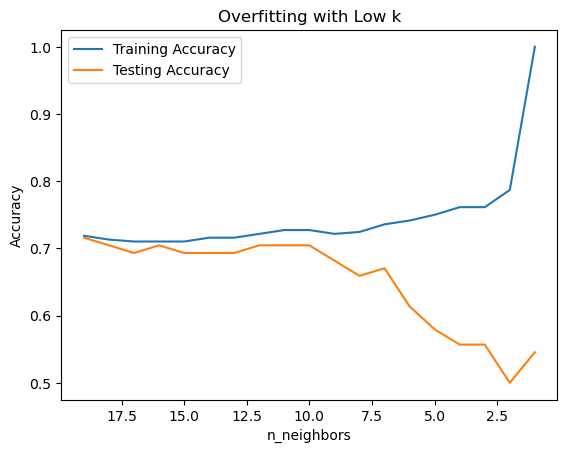

In [49]:
neighbors_range = range(1, 20)
train_accuracies = []
test_accuracies = []

# Loop through each value of k and calculate accuracy
for k in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    
    train_accuracies.append(knn.score(X_train, y_train))
    test_accuracies.append(knn.score(X_test, y_test))


plt.plot(neighbors_range, train_accuracies, label="Training Accuracy")
plt.plot(neighbors_range, test_accuracies, label="Testing Accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.title('Overfitting with Low k')
ax = plt.gca()
ax.invert_xaxis()
plt.savefig(r'C:\Users\kurap\Downloads\plots\kNN.png')
plt.show()